<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/Integration_sine_GaussLegendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Sine Integration: Gauss-Legendre Quadrature</h1></b>

Dr. Bingsen Wang

5/4/2025
</center>

#Python Code

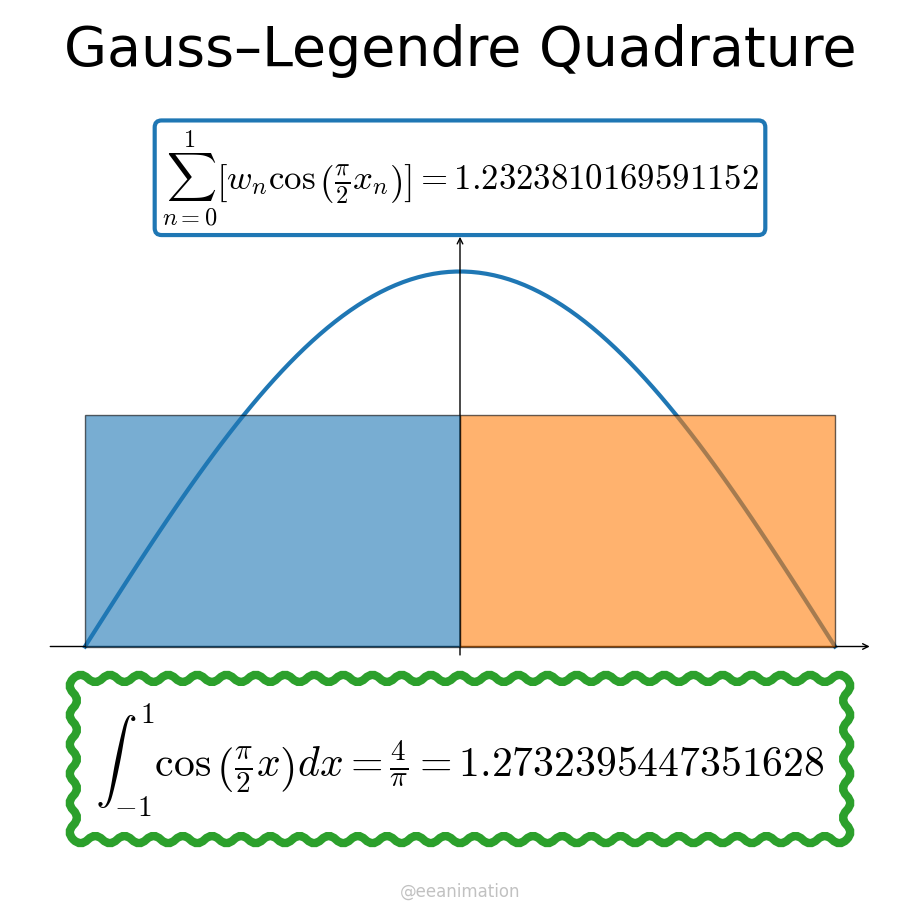

In [83]:
from matplotlib import pyplot,animation,cm,patches,path
from scipy.special import roots_legendre as rl
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def f(x):  return np.cos(x*np.pi/2)
def sineSum_glq(x,w):   return np.sum(f(x)*w)

x_lst,w_lst=[],[]
for k in range(100):
  x,w=rl(k+2);   x_lst.append(x); w_lst.append(w)
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xylim=[-1.2,1.2]
ax = fig.add_axes([0,0,1,1],xlim=xylim,ylim=xylim); ax.axis('off')
ax1 = fig.add_axes([0,0,1,1],xlim=xylim,ylim=xylim,fc='none');ax1.axis('off')
ax.text(0,1.05,"Gauss–Legendre Quadrature",size=40,ha='center')
xy=np.array([0,-.5])
ax.annotate('',xy+np.array([1.1,0]),xy+np.array([-1.1,0]),arrowprops=dict(arrowstyle='->',lw=1))
ax.annotate('',xy+np.array([0,1.1]),xy+np.array([0,-.03]),arrowprops=dict(arrowstyle='->',lw=1))
t=np.linspace(-1,1,100)
ax.plot(t+xy[0],f(t)+xy[1],color=cl[0],lw=3)
ax.text(0,-.8,r'$\int_{-1}^{1}\cos\left(\frac{\pi}{2}x\right) dx=\frac{4}{\pi}=$'+rf'${4/np.pi:.16f}$', size=30,ha='center',va='center',
        bbox=dict(boxstyle='roundtooth',pad=.7,facecolor='none',edgecolor=cl[2],lw=6))
txt=ax.text(0,xy[1]+1.25,'',size=25,ha='center',va='center',bbox=dict(boxstyle='round',pad=.2,facecolor='none',edgecolor=cl[0],lw=3))
def animate(i):
  ax1.cla(); ax1.axis('off');ax1.set_xlim(xylim); ax1.set_ylim(xylim)
  for k in range(i+2):
    wk=sum(w_lst[i][:k])
    verts=[(wk+t[0],0)+xy]+ [(wk+t[0],f(x_lst[i][k]))+xy] + [(wk+w_lst[i][k]+t[0],f(x_lst[i][k]))+xy]+ [(wk+w_lst[i][k]+t[0],0)+xy] +[(0,0)]
    codes=[patches.Path.MOVETO]+[patches.Path.LINETO]*(len(verts)-2)+[patches.Path.CLOSEPOLY]
    ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[k%len(cl)],ec='k',zorder=2,alpha=.6))
    txt.set_text(rf'$\sum_{{n=0}}^{{{i+1}}}\left[w_n\cos\left(\frac{{\pi}}{{2}}x_n\right)\right]={sineSum_glq(x_lst[i],w_lst[i]):.16f}$')
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=20, interval=20)
anim.save("sineSum_glq.mp4",writer=animation.FFMpegWriter(fps=2),dpi=200)